# Business Analytics Project

First internship task in the analytical department at Yandex.Afisha: Help optimizing marketing expenses.

What's provided?
- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

What's to study?
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

Description of the data:

The `visits` table (server logs with data on website visits):
- Uid — user's unique identifier
- Device — user's device
- Start Ts — session start date and time
- End Ts — session end date and time
- Source Id — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

The `orders` table (data on orders):
- Uid — unique identifier of the user making an order
- Buy Ts — order date and time
- Revenue — Yandex.Afisha's revenue from the order

The `costs` table (data on marketing expenses):
- source_id — ad source identifier
- dt — date
- costs — expenses on this ad source on this day

## Step 1. Download the data and prepare it for analysis
Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.

In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv', 
                     dtype={'Device': 'category', 'Source Id': 'category'}, 
                     parse_dates=['Start Ts', 'End Ts'])

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [4]:
visits.columns= visits.columns.str.lower().str.replace(' ', '_')

In [5]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  category      
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [7]:
visits.duplicated().sum()

0

In [8]:
visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

*In the `visits` table, 'Device' and 'Source Id' were changed to category type, 'End Ts' and 'Start Ts' to datetime type - both in the reading process of the data. column names were formatted to lower case to be python friendly. no duplicated or missing values were detected.*

Moving to `orders`.

In [9]:
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
orders.columns= orders.columns.str.lower().str.replace(' ', '_')

In [12]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [13]:
orders.duplicated().sum()

0

In [14]:
orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

*In the `orders` table, 'Buy Ts' was changed to datetime type - also in the reading process of the data. column names were formatted to lower case to be python friendly. no duplicated or missing values were detected.*

Forward to `costs`.

In [15]:
costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [17]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [18]:
costs.duplicated().sum()

0

In [19]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

*In the `costs` table, 'dt' was changed to datetime type - also in the reading process of the data. fortunately, column names were already python friendly. no duplicated or missing values were detected.*

**Changing column types when reading the data helps optimising it which make further analysis smoother.**

## Step 2. Make reports and calculate metrics

### 1. Product

#### 1.1 How many people use it every day, week, and month?

In [20]:
#creating new specific columns for further analysis
visits['session_year']  = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]') 
visits['session_date'] = visits['start_ts'].dt.date

Daily Active Users

In [21]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})

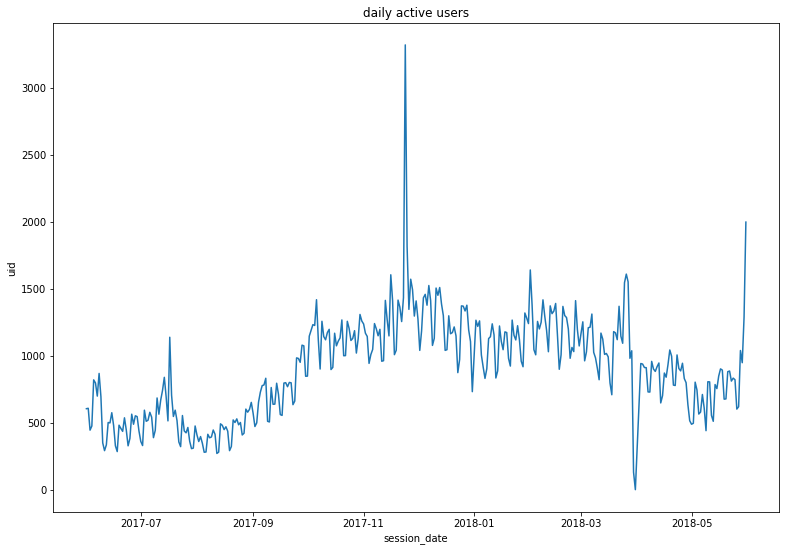

In [22]:
plt.figure(figsize=(13,9)) 
plt.title('daily active users')
sns.lineplot(data=dau, x='session_date', y='uid');

The graph shows a steady grow, then a peak around November, probably a result of 'Black Friday', after that returns to normal then a dip around March. let's see the actual dates.

In [23]:
print("Date with the highest number of visits is", visits.groupby(visits['start_ts'].dt.date)['uid']\
      .nunique().reset_index().sort_values(by= "uid", ascending=False).iloc[0,0])

print("Date with the lowest number of visits is", visits.groupby(visits['start_ts'].dt.date)['uid']\
      .nunique().reset_index().sort_values(by= "uid", ascending=False).iloc[-1,0])

Date with the highest number of visits is 2017-11-24
Date with the lowest number of visits is 2018-03-31


In 2017 Black Friday really fell on the 24th of November, so that correlates and makes sense there would be many visitors that day.
31st March 2018 was a holiday so that might explain the sharp decrease in visiting.

In [24]:
math.ceil(dau.mean())

908

On average, about 908 people use Yandex.Afisha every day.

Moving on to WAU.

Weekly Active Users

In [25]:
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})

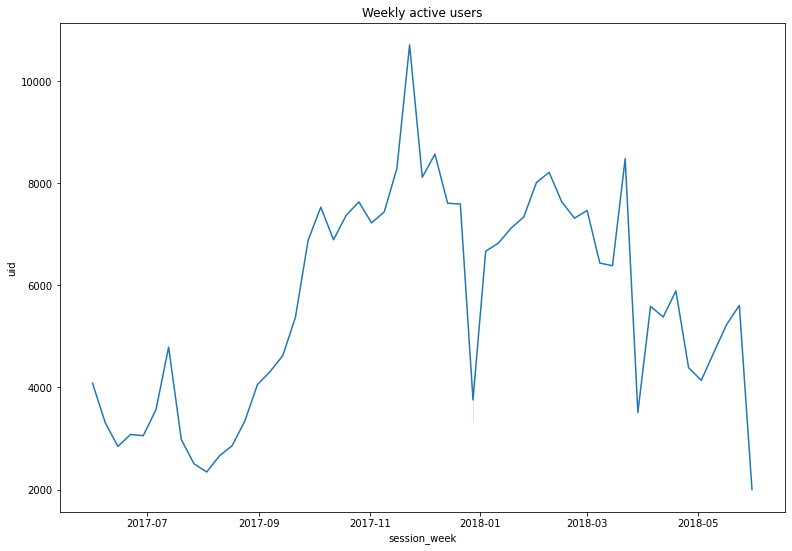

In [26]:
plt.figure(figsize=(13,9)) 
plt.title('Weekly active users')
sns.lineplot(data=wau, x='session_week', y='uid');

In this graph we see that in the summer of 2017 there weren't many sessions, and only in late September the traffic increases. it is steady with the peak in Novmember-December and then a drop in the beginning of January due to holidays. January-March are pretty OK with traffic but then there's a decrease with a minor increase to be dropped again due to the end of data collection.

In [27]:
math.ceil(wau.mean())

5622

On average, about 5622 people use Yandex.Afisha every week.

Moving on to MAU.

Monthly Active Users

In [28]:
mau = (visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}))

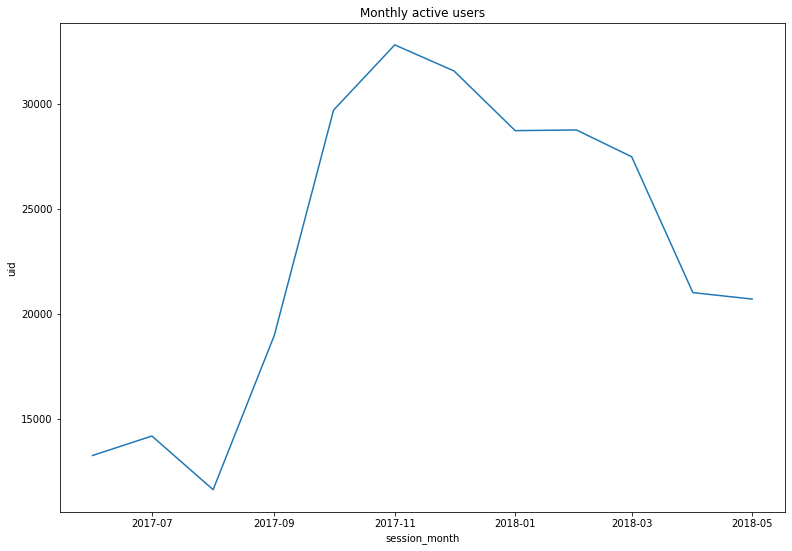

In [29]:
plt.figure(figsize=(13,9)) 
plt.title('Monthly active users')
sns.lineplot(data=mau, x='session_month', y='uid');

Looking broadly we do not see the same ups and downs we saw in WAU, yes we do spot the unsuccessful kickstart of the summer but from September on it seems growing steadily, with only a slight decrease in January and then a sharp one in March.

In [30]:
math.ceil(mau.mean())

23229

On average, about 23229 people use Yandex.Afisha every month.

#### 1.2 How many sessions are there per day? (One user might have more than one session.)

In [31]:
sessions_per_user = visits.groupby('session_date').agg({'uid':['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print('Number of sessions per day per user:', sessions_per_user['sessions_per_user'].mean().round(2))

Number of sessions per day per user: 1.08


In [32]:
sessions_per_user

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


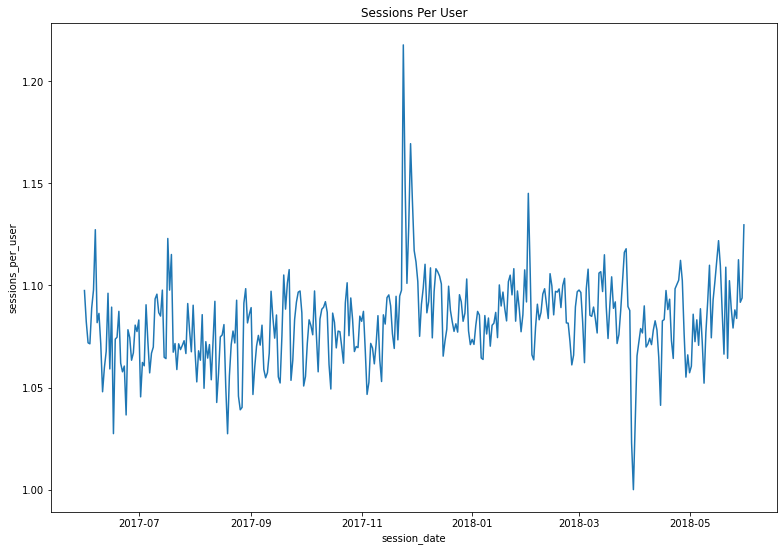

In [33]:
plt.figure(figsize=(13,9)) 
plt.title('Sessions Per User')
sns.lineplot(data=sessions_per_user, x='session_date', y='sessions_per_user');

- The number of sessions per day per user, on average, is 1.08 session(s).
- This graph corresponds to DAU, as it shows a steady number of sessions, a peak around the end of November 2017 and a major drop around the end of March 2018. 

In [34]:
sessions_per_user_sources = visits.groupby(['source_id', 'session_date']).agg({'uid':['count', 'nunique']})
sessions_per_user_sources.columns = ['n_sessions', 'n_users']
sessions_per_user_sources = sessions_per_user_sources.groupby('source_id').agg({'n_sessions':'sum', 'n_users':'sum'})
sessions_per_user_sources['sessions_per_user'] = sessions_per_user_sources['n_sessions'] / sessions_per_user_sources['n_users']
sessions_per_user_sources.sort_values('n_sessions', ascending = False)

,n_sessions,n_users,sessions_per_user
source_id,,,
4,101794,99990,1.018042
3,85610,84530,1.012777
5,66905,63751,1.049474
2,47626,43817,1.086930
1,34121,29323,1.163626
9,13277,13108,1.012893
10,10025,9450,1.060847
7,36,36,1.000000
6,6,6,1.000000


- The sources whom attract most sessions are 4,3,5,2. We will see later how much the company invests in them for customer acquisition, and if the investment was worth it.

#### 1.3 What is the length of each session?

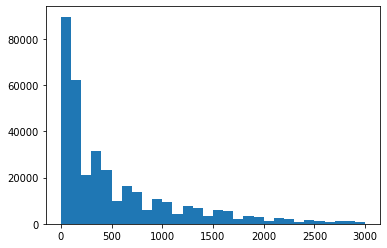

In [35]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].hist(bins=30, range=[0,3000], grid=False);

In [36]:
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-01-01,2017-07-01,2017-07-27,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-01,2018-01-25,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-01-01,2018-03-01,2018-03-01,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-01-01,2017-11-01,2017-11-02,2017-11-02,19


In [37]:
visits['session_duration_sec'].value_counts()

60       53029
0        35794
120      35748
180      26672
240      21085
         ...  
14880        1
18840        1
83640        1
20100        1
15660        1
Name: session_duration_sec, Length: 312, dtype: int64

In [38]:
visits['session_duration_sec'].value_counts(normalize=True) * 100

60       14.754869
0         9.959377
120       9.946578
180       7.421258
240       5.866722
           ...    
14880     0.000278
18840     0.000278
83640     0.000278
20100     0.000278
15660     0.000278
Name: session_duration_sec, Length: 312, dtype: float64

In [39]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

In [40]:
visits['session_duration_sec'].median()

300.0

Even though '60' is the mode, it does not reflect the session time, as it covers only 14% of the values. Median is used for this question this time.
We want users to visit our website for a long time, so 60 is not a good value, as it is only 1 minute.

#### 1.4 What's the user retention rate?

In [41]:
visits['session_date'] = pd.to_datetime(visits['session_date'])
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
user_activity = visits.join(first_activity_date,on='uid')
user_activity['first_activity_date'] = pd.to_datetime(user_activity['first_activity_date']).dt.normalize()
user_activity['start_ts'] = user_activity['start_ts'].astype('datetime64[D]')
user_activity['activity_month'] = user_activity['start_ts'].astype('datetime64[M]')
user_activity['first_activity_month'] = user_activity['first_activity_date'].astype('datetime64[M]')
user_activity['cohort_lifetime'] = ((user_activity['activity_month'] - user_activity['first_activity_month']) / np.timedelta64(1,'M')).round().astype(int)

cohorts = user_activity.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [42]:
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [43]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


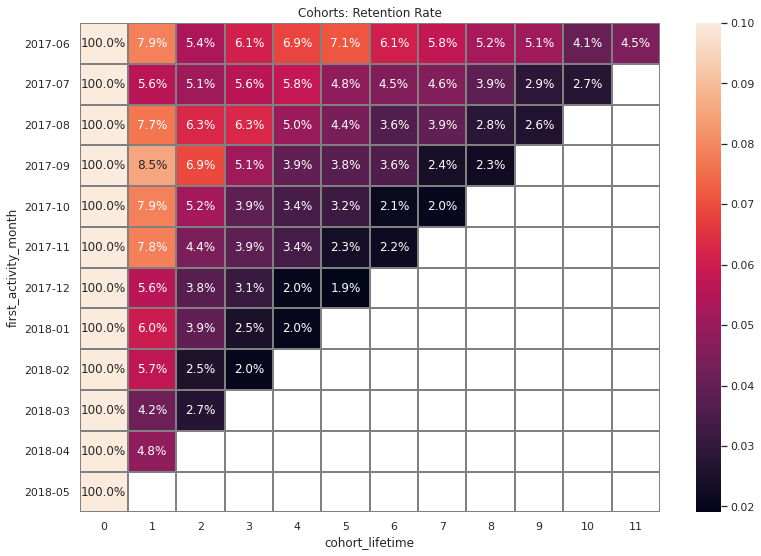

In [44]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1).set_yticklabels(retention_pivot.index.strftime('%Y-%m'))
plt.show()

- None of the cohorts crossed the 10% retention, the one that's closest to it is 09-2017 with 8.5% in the first lifetime.
- None of the cohorts dropped below 2% which is a good sign that the customers are still interested in the website in the long run 
- All relevant cohorts (06-2017 to 10-2017) had a 5% + retention rate relating to November 2017.

### 2. Sales

#### 2.1 When do people start buying?
(In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

In [45]:
first_order_dates = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order_dates.columns= ['uid','first_order_date']
 

first_session_dates = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_session_dates.columns= ['uid','first_session_date']
 
conversion = pd.merge(first_session_dates, first_order_dates, on='uid')
 
conversion['conversion_time_days'] = (conversion['first_order_date'] - conversion['first_session_date']).dt.days
 
avg_conversion_time = conversion['conversion_time_days'].mode()

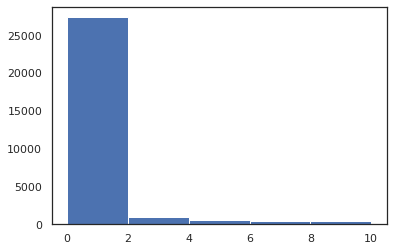

In [46]:
conversion['conversion_time_days'].hist(bins=5, range=[0,10], grid=False);

In [47]:
conversion['conversion_time_days'].describe()

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion_time_days, dtype: float64

In [48]:
conversion['conversion_time_days'].mode()

0    0
dtype: int64

In [49]:
conversion['conversion_time_days'].value_counts(normalize=True) * 100

0      72.181913
1       2.768119
2       1.541494
3       1.188292
4       0.887112
         ...    
312     0.002738
309     0.002738
341     0.002738
325     0.002738
337     0.002738
Name: conversion_time_days, Length: 345, dtype: float64

Even though the mean conversion time is 17 days,
We cannot say that it's usually when people start buying. In fact, 72% of the data points that it's 0 days to purchase. Also the graph shows that people buy immediately, which is good - they know what they came here for!

#### 2.2  How many orders do they make during a given period of time?

In [50]:
first_order_dates['first_order_month'] = first_order_dates['first_order_date'].astype('datetime64[M]')
orders = orders.merge(first_order_dates, how ='left', on='uid')
cohort_sizes = orders.groupby('first_order_month')['uid'].agg('nunique').reset_index()
cohort_sizes.columns = ['first_order_month', 'cohort_size']
cohort_sizes

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [51]:
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
cohort=orders.groupby(['first_order_month','month'])['revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
cohort=cohort.merge(cohort_sizes,on=['first_order_month'])
cohort['age'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']

In [52]:
cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_piv.round(2).fillna('')

age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


In [53]:
total_customers = cohort_sizes['cohort_size'].sum()
total_orders = orders['revenue'].count()
average_order_per_customer = total_orders / total_customers
print('{:.1f}'.format(average_order_per_customer))

1.4


- The customers make 1.4 order(s) on average. 
- We can see that this number increases steadily in all cohorts, which is a good sign, that they find the website useful.
- The longer a cohort engages with the websites, the more orders they will place.

#### 2.3 What is the average purchase size?

In [54]:
average_purchase_size = orders.groupby('month')['revenue'].mean().reset_index()

In [55]:
average_purchase_size.sort_values('revenue', ascending=False)

,month,revenue
6,2017-12-01,5.852139
3,2017-09-01,5.416448
9,2018-03-01,5.413930
1,2017-07-01,5.306589
10,2018-04-01,5.150645
4,2017-10-01,4.928280
2,2017-08-01,4.847139
8,2018-02-01,4.840095
5,2017-11-01,4.783518
11,2018-05-01,4.771279


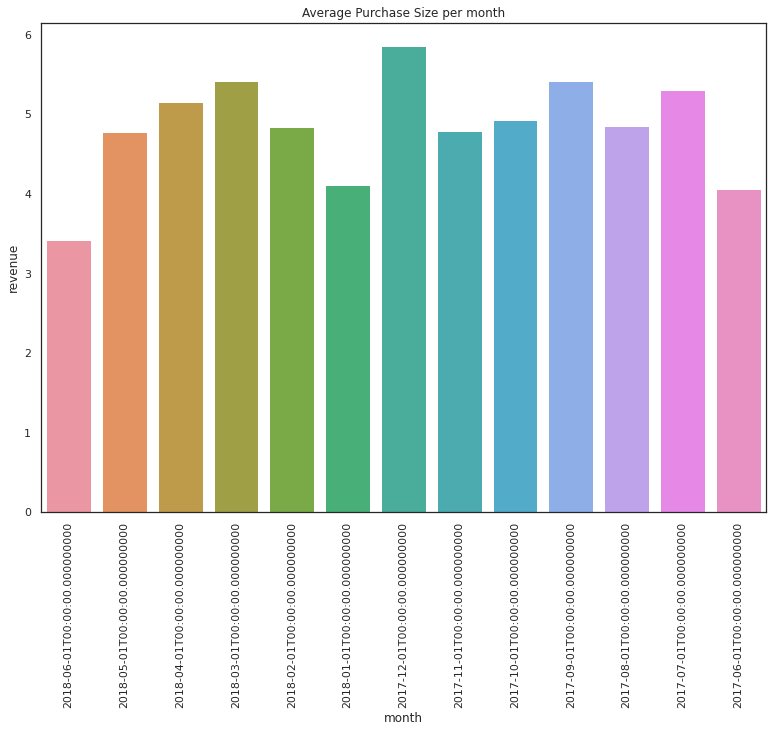

In [56]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Average Purchase Size per month')
sns.barplot(data=average_purchase_size.sort_values('month', ascending=False), x='month', y='revenue')
plt.xticks(rotation = 90)
plt.show();

In [57]:
print(orders.revenue.sum())
print(orders.revenue.mean())

252057.19999999998
4.999646930477041


- The total revenue is 252057.19999999998
- The average purchase size is very close to 5. 
- Surprisingly, 12-2017 has the highest revenue. We would expect that 11-2017 would be the highest one, but maybe one strong day does not affect the whole month's sales. 
- The month with the lowest revenue among them is 06-2018, which is not surprising, because the data is not complete for this month.
- The month after 06-2018 with low revenue is 06-2017. 

#### 2.4 How much money do they bring? (LTV)

In [58]:
ltv_cohort=orders.groupby(['first_order_month','month'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['first_order_month','month','revenue']
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort

,first_order_month,month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0,4.660562


In [59]:
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

In [60]:
ltv_cohort_piv.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


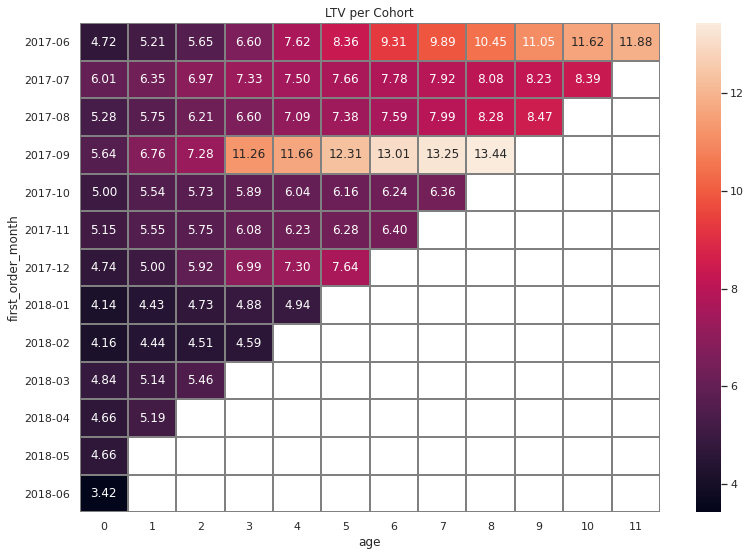

In [61]:
plt.figure(figsize=(13,9))
plt.title('LTV per Cohort')
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey').set_yticklabels(ltv_cohort_piv.index.strftime('%Y-%m'))
plt.show()

- Just as the orders nubmer keep increasing, we can see that lifetime increases for all cohorts. Data shows once again it means the customers are interested in the products the website offers.
- The 09-2017 cohort had a rather big peak in purchasing in the 3rd lifetime, which is 12-2017.
- Looking in other cohorts and comparing them, only one of them doubled their purchase for the same reason - the 06-2017 cohort. It went from 4.72 in their first lifetime to 9.31 in the 6th lifetime, which was 12-2018.
- All other relevant cohorts weren't going too crazy about this month, they were just increasing the sales slowly but consistently.

### 3. Marketing
- Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

#### 3.1 How much money was spent? Overall, per source and over time.


In [62]:
print('{}'.format(costs['costs'].sum()))

329131.62


The amount of marketing spending overall is 329131.62.

In [63]:
costs=costs.sort_values(by=['dt', 'source_id'])
per_source = costs.groupby('source_id')['costs'].sum().reset_index()
per_source.sort_values('costs', ascending=False)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


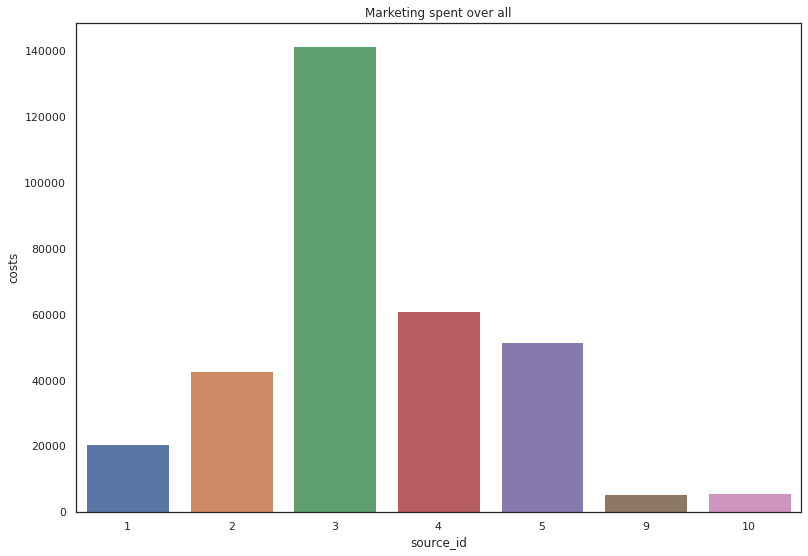

In [64]:
plt.figure(figsize=(13,9))
plt.title('Marketing spent over all')
sns.barplot(x='source_id',y='costs',data=per_source);

In [65]:
costs['month'] = costs['dt'].astype('datetime64[M]')
source_time = costs.groupby('month')['costs'].sum().reset_index()
source_time.sort_values('costs', ascending=False)

,month,costs
6,2017-12-01,38315.35
5,2017-11-01,37907.88
4,2017-10-01,36322.88
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27
3,2017-09-01,24368.91
10,2018-04-01,22289.38
11,2018-05-01,22224.27
1,2017-07-01,18240.59


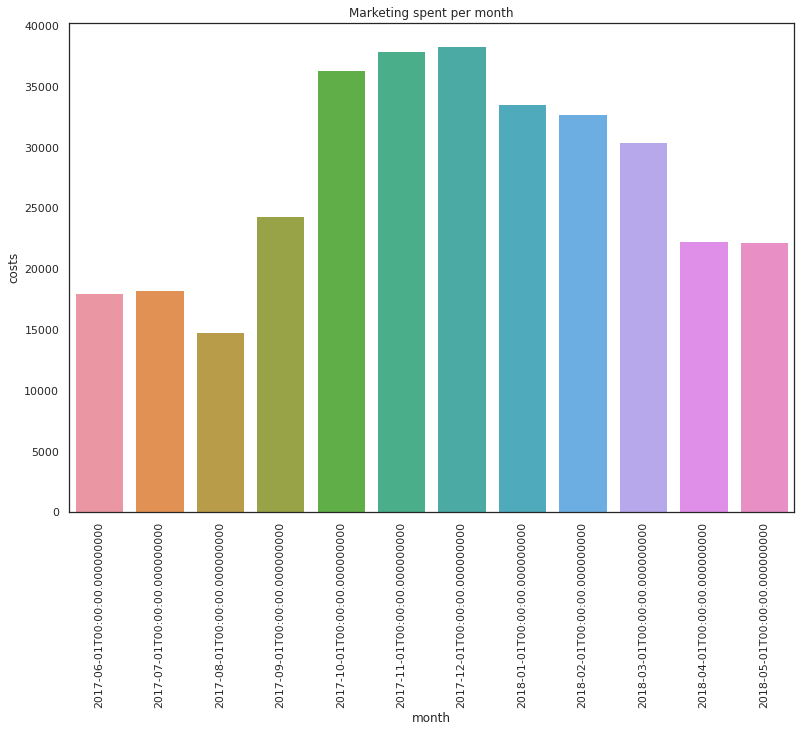

In [66]:
plt.figure(figsize=(13,9))
plt.title('Marketing spent per month')
sns.barplot(x='month',y='costs',data=source_time)
plt.xticks(rotation = 90);

In [67]:
# grouping sum of costs by source and month
marketing_by_month_source = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
marketing_by_month_source

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


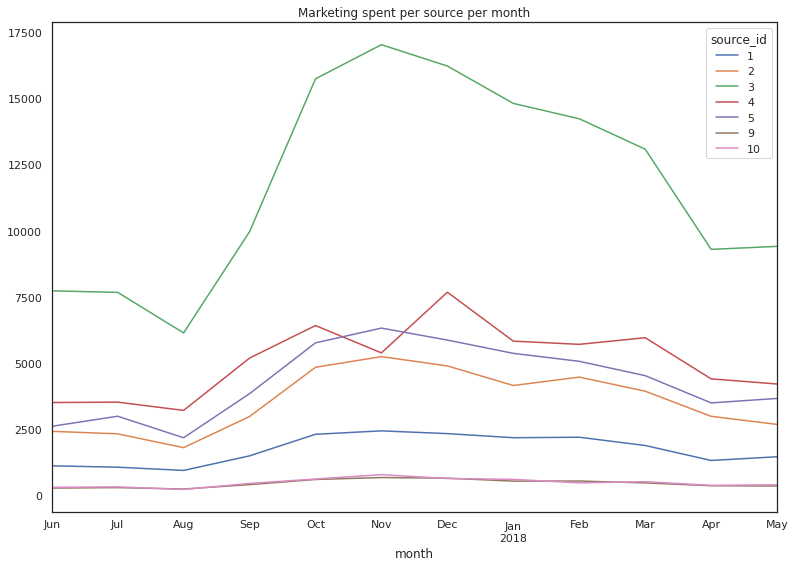

In [68]:
marketing_by_month_source.plot(kind='line', figsize=(13,9), title='Marketing spent per source per month');

- Source #3 is the one the marketing team spends the most on, after him we have sources 4,5,2.
- It corresponds to the number of sessions each source brings to the website. (even though source 4 brings more traffic to the website than source 3)
- The more money invested on the sources, the more traffic it brings. but does that traffic really converts? we shall see.
- Highest marketing budgets were on 12-2017 and 11-2017, for holidays and black friday.

#### 3.2 How much did customer acquisition from each of the sources cost?

In [69]:
cac_calc = pd.merge(cohort_sizes, source_time, left_on='first_order_month', right_on='month')
cac_calc['CAC'] = cac_calc['costs'] / cac_calc['cohort_size']
cac_calc.sort_values('CAC', ascending=False)

,first_order_month,cohort_size,month,costs,CAC
2,2017-08-01,1370,2017-08-01,14790.54,10.796015
7,2018-01-01,3373,2018-01-01,33518.52,9.937302
10,2018-04-01,2276,2018-04-01,22289.38,9.793225
1,2017-07-01,1923,2017-07-01,18240.59,9.485486
3,2017-09-01,2581,2017-09-01,24368.91,9.441654
5,2017-11-01,4081,2017-11-01,37907.88,9.288870
8,2018-02-01,3651,2018-02-01,32723.03,8.962758
0,2017-06-01,2023,2017-06-01,18015.00,8.905091
6,2017-12-01,4383,2017-12-01,38315.35,8.741809
9,2018-03-01,3533,2018-03-01,30415.27,8.608907


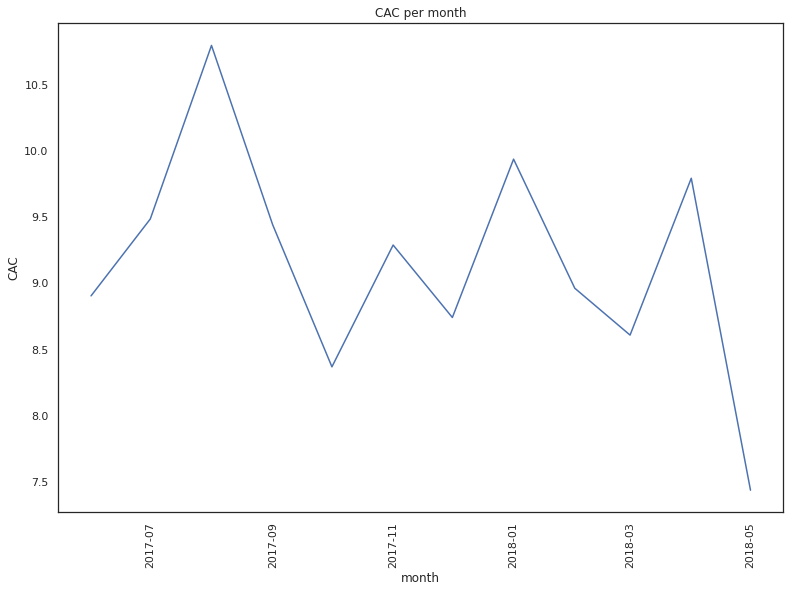

In [70]:
plt.figure(figsize=(13,9))
plt.title('CAC per month')
sns.lineplot(data=cac_calc, x='month', y='CAC')
plt.xticks(rotation = 90);

In [71]:
 cac_calc['CAC'].mean()

9.147357292482544

Mean CAC overall is about 9.15 which is pretty high. let's see how it's distributed by marketing sources

In [72]:
# getting first source for each user
first_source=visits.sort_values('start_ts').groupby('uid').agg({'source_id': 'first'}).reset_index()
# renaming
first_source.columns=['uid','first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [73]:
orders = orders.merge(first_source, how='left', on='uid')

In [74]:
# grouping unique users count by first order month and first source
buyers_per_month_source=orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
# renaming
buyers_per_month_source.columns=['month','source_id','buyers']
buyers_per_month_source

,month,source_id,buyers
0,2017-06-01,1,190
1,2017-06-01,10,95
2,2017-06-01,2,235
3,2017-06-01,3,638
4,2017-06-01,4,413
...,...,...,...
81,2018-05-01,3,844
82,2018-05-01,4,804
83,2018-05-01,5,497
84,2018-05-01,9,60


In [75]:
buyers_per_month_source['source_id'] = buyers_per_month_source['source_id'].astype('int')

In [76]:
CAC_per_month_source= buyers_per_month_source.merge(costs, how='left', on=['source_id', 'month'])
# forming CAC column
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source

,month,source_id,buyers,dt,costs,CAC
0,2017-06-01,1,190,2017-06-01,75.20,0.395789
1,2017-06-01,1,190,2017-06-02,62.25,0.327632
2,2017-06-01,1,190,2017-06-03,36.53,0.192263
3,2017-06-01,1,190,2017-06-04,55.00,0.289474
4,2017-06-01,1,190,2017-06-05,57.08,0.300421
...,...,...,...,...,...,...
2539,2018-05-01,9,60,2018-05-28,12.47,0.207833
2540,2018-05-01,9,60,2018-05-29,16.83,0.280500
2541,2018-05-01,9,60,2018-05-30,23.57,0.392833
2542,2018-05-01,9,60,2018-05-31,27.37,0.456167


In [77]:
cac_source = CAC_per_month_source.pivot_table(index='month', columns='source_id', values='CAC', aggfunc='sum')
cac_source

source_id,1,2,3,4,5,7,9,10
month,,,,,,,,
2017-06-01,5.924263,10.329277,12.118574,8.510412,6.812813,NaN,4.194412,3.307579
2017-07-01,6.705500,11.216875,14.989004,6.827331,7.087801,NaN,5.818077,6.467059
2017-08-01,8.423097,14.723984,18.230089,9.518817,6.070222,0.0,4.080820,6.285676
2017-09-01,6.616784,13.509774,12.757426,8.800441,6.535042,NaN,4.777241,5.356628
2017-10-01,6.811029,12.234848,13.660799,5.478532,6.103069,NaN,4.836587,3.001148
2017-11-01,7.546790,13.185126,14.001102,4.578437,9.127475,NaN,4.711586,6.190313
2017-12-01,7.073112,12.855118,12.315505,5.577683,7.616757,NaN,5.437851,7.598353
2018-01-01,9.185630,14.238836,14.720457,5.651928,8.485814,NaN,6.839500,6.677717
2018-02-01,8.016291,15.270785,13.029817,5.164521,7.479808,NaN,6.565476,3.909593


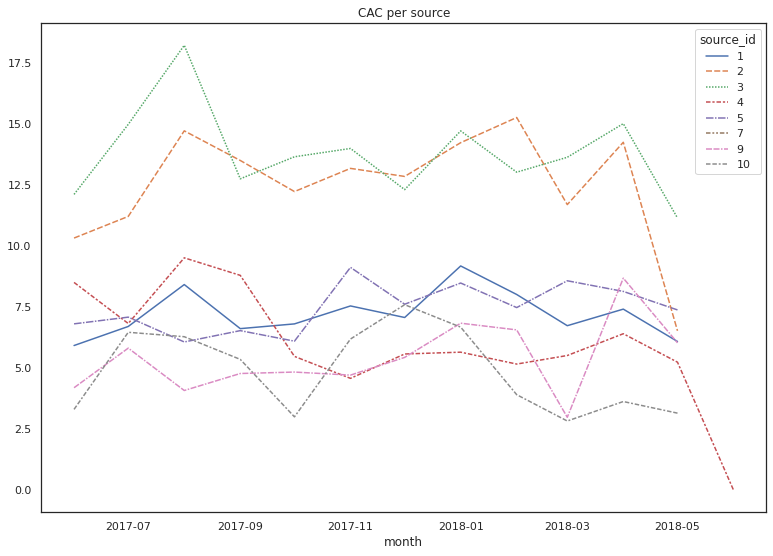

In [78]:
plt.figure(figsize=(13,9))
plt.title('CAC per source')
sns.lineplot(data=cac_source)
plt.show();

In [79]:
buyers_per_month_source.groupby('source_id').sum().sort_values('buyers', ascending=False)

,buyers
source_id,
3,10473
4,10296
5,6931
2,3506
1,2899
10,1329
9,1088
7,1


- Highest CAC's are of sources #3 and #2.
- Source #3 bring the most buyers - 10473. 
- After that, source 4 with 10296 buyers, and a very small CAC!
- Source 5 brings 6931 buyers with a little bit higher CAC.
- Source 2 brings only 3506 which is pretty low and the CAC is too high. not good.

#### 3.3 How worthwhile were the investments? (ROI)

In [80]:
cac_per_month_ROI=cac_calc[['month','CAC']]
# renaming
cac_per_month_ROI.columns=['first_order_month','CAC']
# merging with ltv_cohort to build ROI table
ROI=ltv_cohort.merge(cac_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

,first_order_month,month,revenue,cohort_size,age,ltv,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,8.905091


In [81]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
# building pivot table
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI').cumsum(axis=1).round(2)

In [82]:
roi_piv

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


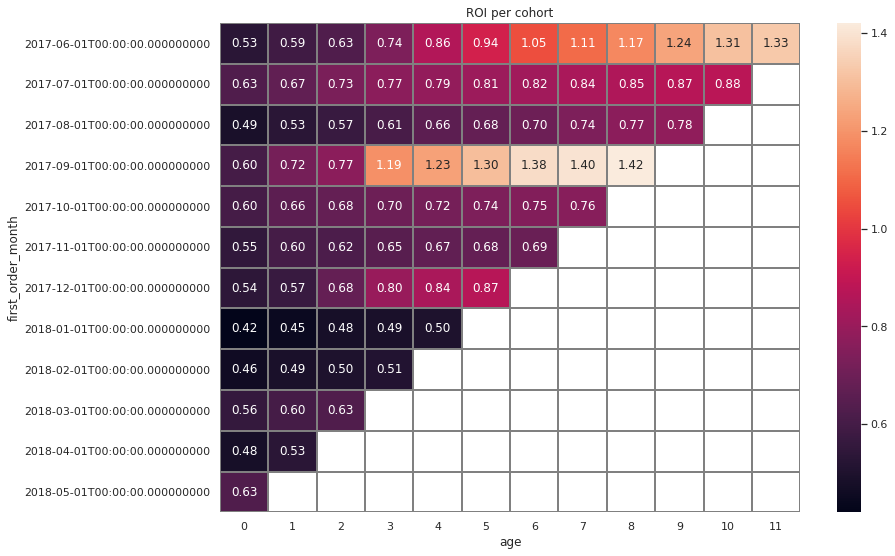

In [83]:
# visualizing ROi using heat map
plt.figure(figsize=(13,9))
plt.title('ROI per cohort')
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey')
plt.show()

The heatmap shows the ROI is increasing for all cohorts although it's very small. let's see if it's the same for the sources

In [84]:
revenue_per_source=orders.groupby('first_source').agg({'revenue':'sum'}).reset_index()
revenue_per_source.sort_values('revenue', ascending=False)

,first_source,revenue
4,4,56696.83
3,3,54511.24
5,5,52624.02
2,2,46923.61
0,1,31090.55
7,9,5759.40
1,10,4450.33
6,7,1.22


In [85]:
revenue_per_source['source_id'] = revenue_per_source['first_source'].astype(int)
revenue_per_source = revenue_per_source.drop('first_source', axis=1)

In [86]:
romi_df = CAC_per_month_source.merge(revenue_per_source, on= "source_id")
romi_df

,month,source_id,buyers,dt,costs,CAC,revenue
0,2017-06-01,1,190,2017-06-01,75.20,0.395789,31090.55
1,2017-06-01,1,190,2017-06-02,62.25,0.327632,31090.55
2,2017-06-01,1,190,2017-06-03,36.53,0.192263,31090.55
3,2017-06-01,1,190,2017-06-04,55.00,0.289474,31090.55
4,2017-06-01,1,190,2017-06-05,57.08,0.300421,31090.55
...,...,...,...,...,...,...,...
2539,2018-05-01,9,60,2018-05-28,12.47,0.207833,5759.40
2540,2018-05-01,9,60,2018-05-29,16.83,0.280500,5759.40
2541,2018-05-01,9,60,2018-05-30,23.57,0.392833,5759.40
2542,2018-05-01,9,60,2018-05-31,27.37,0.456167,5759.40


In [87]:
romi_df['ltv'] = romi_df['revenue']/ romi_df['buyers']
romi_df['romi'] = romi_df['ltv']/ romi_df['CAC']

In [88]:
romi_df

,month,source_id,buyers,dt,costs,CAC,revenue,ltv,romi
0,2017-06-01,1,190,2017-06-01,75.20,0.395789,31090.55,163.634474,413.438165
1,2017-06-01,1,190,2017-06-02,62.25,0.327632,31090.55,163.634474,499.446586
2,2017-06-01,1,190,2017-06-03,36.53,0.192263,31090.55,163.634474,851.096359
3,2017-06-01,1,190,2017-06-04,55.00,0.289474,31090.55,163.634474,565.282727
4,2017-06-01,1,190,2017-06-05,57.08,0.300421,31090.55,163.634474,544.683777
...,...,...,...,...,...,...,...,...,...
2539,2018-05-01,9,60,2018-05-28,12.47,0.207833,5759.40,95.990000,461.860465
2540,2018-05-01,9,60,2018-05-29,16.83,0.280500,5759.40,95.990000,342.210339
2541,2018-05-01,9,60,2018-05-30,23.57,0.392833,5759.40,95.990000,244.352991
2542,2018-05-01,9,60,2018-05-31,27.37,0.456167,5759.40,95.990000,210.427475


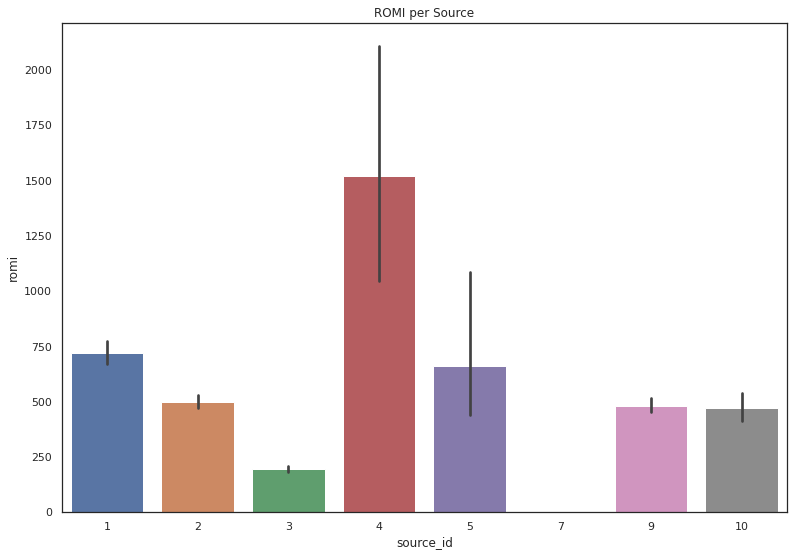

In [89]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI per Source')
sns.barplot(data=romi_df, x='source_id', y='romi');

Turns out source #4, #1, and #5 are the sources which are worthwhile. they have the highest ROMI.

## Step 3. Write a conclusion: advise marketing experts how much money to invest and where.
- What sources/platforms would you recommend?
Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

- Datasets arrived with no duplicates and missing values
- Preprocessing was done while importing the data


- On average, 908 people use Yandex Afisha every day, about 5717 people every week, and about 23229 people every month.
- The highest daily visits occured on black friday and the lowest daily visits occured on a holiday
- On average, there is about 1 session per day, and each session lasts about 300 seconds.
- On average, people start buying right away, and the average purchase size is about 5.

- The customers make 1.4 order(s) on average, this number increases steadily in all cohorts, which is a good sign, that they find the website useful.
- The longer a cohort engages with the websites, the more orders they will place.
- 12-2017 has the highest revenue

- The sources whom attract most sessions are 4,3,5,2. 
- Highest marketing budgets were on 12-2017 and 11-2017, for holidays and black friday.
- Plaform 3 has the highest cost but it is amongst the least revenue generators.


- I would recommend the marketing experts to invest more in sources 10 and 9 and cut costs in plaform 3.
- Platforms 4 and 5 have a decent romi and they can try prioritise them aswell